In [3]:
from scipy.integrate import odeint
from scipy.linalg import eig, expm
import numpy as np
import matplotlib.pyplot as plt

Matrix form: 

The given functions are as follows:

$
\frac{dx1}{dt} = \frac{-1}{50x1}
$

$
\frac{dx2}{dt} =  \frac{1}{50x1} - \frac{2}{75x2}
$

$
\frac{dx3}{dt} = \frac{2}{75x2} - \frac{1}{25x3}
$

giving the array:

[A = -1/50,     0,       0

1/50, -2/75,       0
     
0,    2/75,    -1/25]
      
And,

X = [x1

    x2
    
    x3 ]


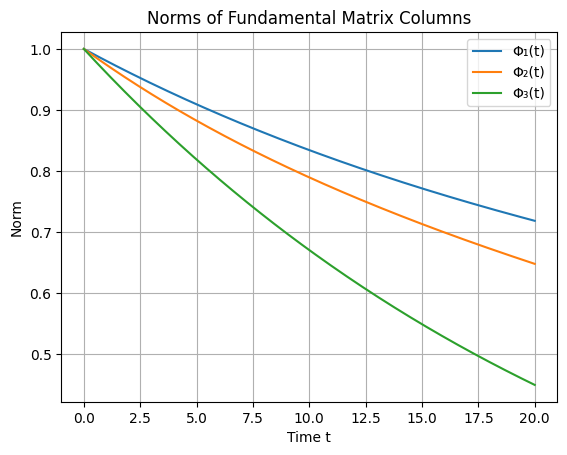

In [6]:
"""Find a fundamental Matrix Solution"""
# Define matrix A
A = np.array([
    [-1/50,     0,       0],
    [ 1/50, -2/75,       0],
    [    0,  2/75,  -1/25]
])

# Eigenvalues and Eigenvectors
eigvals, eigvecs = eig(A)

# Build Fundamental Matrix Solution
""" Solve x(vector)*t = Φ(t)x(0vector)"""

"""
Explanation of Φ(t) = V * exp(D * t) * V^-1, where A = V D V^-1:

A = V D V^-1 is a diagonaliztion of A> V eigenvectors and D eiganvalues.
E^Dt -> tells how each part of system grows / decays with time
Φ(t) -> fundamental matrix solution. Columns are solutions to each eigenvector.
"""

# Φ(t) = V * exp(D * t) * V^-1, where A = V D V^-1
t_vals = np.linspace(0, 20, 200)
phi_t_list = []

D = np.diag(eigvals)
V = eigvecs
V_inv = np.linalg.inv(V)

for t in t_vals:
    phi_t = V @ np.diag(np.exp(eigvals * t)) @ V_inv
    phi_t_list.append(phi_t)

"""Plot"""
phi_t_array = np.array(phi_t_list)
plt.plot(t_vals, np.linalg.norm(phi_t_array[:, :, 0], axis=1), label='Φ₁(t)')
plt.plot(t_vals, np.linalg.norm(phi_t_array[:, :, 1], axis=1), label='Φ₂(t)')
plt.plot(t_vals, np.linalg.norm(phi_t_array[:, :, 2], axis=1), label='Φ₃(t)')

"""Labels"""
plt.title("Norms of Fundamental Matrix Columns")
plt.xlabel("Time t")
plt.ylabel("Norm")
plt.grid(True)
plt.legend()
plt.show()

In [5]:
"""This checks the values. All should be close to or around 0"""
for i in range(len(eigvals)):
    left = A @ eigvecs[:, i]
    right = eigvals[i] * eigvecs[:, i]
    print(f"Check {i+1}: ||A*v - λ*v|| = {np.linalg.norm(left - right)}")
    #"Check 1: ||A*v - λ*v|| = (measurment of how close vectors are to eachother)"

"""Should produce: 
    
Check 1: ||A*v - λ*v|| = 0.0
Check 2: ||A*v - λ*v|| = 0.0
Check 3: ||A*v - λ*v|| = 3.469446951953614e-18
(3.469446951953614e-18 or 0.000000000000000003469446951953614 ≈ 0 )

"""

Check 1: ||A*v - λ*v|| = 0.0
Check 2: ||A*v - λ*v|| = 0.0
Check 3: ||A*v - λ*v|| = 3.469446951953614e-18
